In [2]:
import meep as mp
import numpy as np
import math

cell_size = mp.Vector3(2,2,5)
sx = 2
sy = 2
sz = 4
r = 0.5
h = 1
dpml = 1
eps_si = 3.54**2
eps_pdms = 1.4**2


geometry = [mp.Block(size = mp.Vector3(1,1,4), material = mp.Medium(index = )),
            mp.Cylinder(radius=r,height=h, material=mp.Medium(index = 3.54))]
pml_layers = [mp.PML(thickness= 1, direction = mp.Z)]
sim = mp.Simulation(resolution=50,
                    cell_size=cell_size,
                    boundary_layers=pml_layers,
                    geometry=geometry)

sim.init_sim()

eps_data = sim.get_epsilon()

from mayavi import mlab
s = mlab.contour3d(eps_data, colormap="YlGnBu")
mlab.show()

-----------
Initializing structure...


In [7]:
import meep as mp
import numpy as np
import math



sx = 1
sy = 1
sz = 8
r = 0.409393
h = 1.25
dpml = 1
eps_si = 3.54**2
eps_pdms = 1.4**2
b_m = 1.4
c_m = 3.54
res = 20

cell_size = mp.Vector3(sx,sy,sz)
geometry = [mp.Block(size = cell_size, material=mp.Medium(index=b_m)),
            mp.Cylinder(radius=r,height=h, material=mp.Medium(index = c_m))]
pml_layers = [mp.PML(thickness= 1, direction = mp.Z, side=mp.High),
              mp.Absorber(thickness=1,direction = mp.Z, side=mp.Low)]
fcen = 0.47647
df = 0.1235
src = [mp.Source(src = mp.GaussianSource(fcen, fwidth=df),
                component = mp.Ex,
                center = mp.Vector3(0,0,-(sz/2 - dpml - 0.5)),
                size = mp.Vector3(sx,sy,0)
               )]
sim = mp.Simulation(resolution=res,
                    cell_size=cell_size,
                    boundary_layers=pml_layers,
                    sources=src,
                    geometry=geometry)
freg = mp.FluxRegion(center=mp.Vector3(0,0,sz/2-dpml-0.5),
                     size = mp.Vector3(sx,sy,0)
                    )
nfreq = 500
trans = sim.add_flux(fcen, df, nfreq, freg)


In [8]:
sim.run(until = 2000)
bend = mp.get_fluxes(trans)


-----------
Initializing structure...
Meep progress: 17.05/2000.0 = 0.9% done in 4.0s, 465.4s to go
Meep progress: 34.550000000000004/2000.0 = 1.7% done in 8.0s, 455.5s to go
Meep progress: 52.075/2000.0 = 2.6% done in 12.0s, 449.2s to go
Meep progress: 68.25/2000.0 = 3.4% done in 16.0s, 453.1s to go
Meep progress: 86.92500000000001/2000.0 = 4.3% done in 20.0s, 440.4s to go
Meep progress: 106.775/2000.0 = 5.3% done in 24.0s, 425.8s to go
Meep progress: 125.30000000000001/2000.0 = 6.3% done in 28.0s, 419.1s to go
Meep progress: 145.125/2000.0 = 7.3% done in 32.0s, 409.2s to go
Meep progress: 165.175/2000.0 = 8.3% done in 36.0s, 400.1s to go
Meep progress: 185.05/2000.0 = 9.3% done in 40.0s, 392.6s to go
Meep progress: 203.75/2000.0 = 10.2% done in 44.0s, 388.2s to go
Meep progress: 220.925/2000.0 = 11.0% done in 48.0s, 386.8s to go
Meep progress: 239.175/2000.0 = 12.0% done in 52.0s, 383.1s to go
Meep progress: 255.07500000000002/2000.0 = 12.8% done in 56.0s, 383.3s to go
Meep progress:

In [15]:
bend

[-0.05696124400778481,
 -0.05688827202582818,
 -0.05677890556398024,
 -0.05665376945774766,
 -0.05651067170711613,
 -0.05637114001175646,
 -0.05628552356974658,
 -0.05610433792820383,
 -0.05590451727899889,
 -0.055693452870881836,
 -0.05546910990625973,
 -0.05523040379744132,
 -0.0549769522406648,
 -0.054708849767684815,
 -0.05442661306027067,
 -0.0541312179997178,
 -0.05382420150597247,
 -0.05350782117501594,
 -0.05318526379036077,
 -0.05286087046648503,
 -0.05254025503866098,
 -0.05222988228667742,
 -0.0519347635545771,
 -0.05165077773368218,
 -0.051346056231257035,
 -0.050940470050372964,
 -0.05035728210936962,
 -0.04965862671877558,
 -0.04892190665600688,
 -0.04829090317544221,
 -0.0477450322274814,
 -0.04714026297304522,
 -0.046480903975857496,
 -0.04570849962267468,
 -0.044780357962712174,
 -0.04395985256712005,
 -0.04320926016968642,
 -0.042508101923720024,
 -0.041848116253143886,
 -0.04122607183431477,
 -0.04064118014377904,
 -0.04009399401972924,
 -0.03958593898183737,
 -0.039

In [ ]:
sim.init_sim()

eps_data = sim.get_epsilon()

from mayavi import mlab
s = mlab.contour3d(eps_data, colormap="YlGnBu")
mlab.show()

In [9]:
sim.reset_meep()

cell_size = mp.Vector3(sx,sy,sz)
geometry = [mp.Block(size = mp.Vector3(sx,sy,sz), material=mp.Medium(index=b_m))]
pml_layers = [mp.PML(thickness= 1, direction = mp.Z, side=mp.High),
              mp.Absorber(thickness=1,direction = mp.Z, side=mp.Low)]
src = [mp.Source(src = mp.GaussianSource(fcen, fwidth=df),
                component = mp.Ex,
                center = mp.Vector3(0,0,-(sz/2 - dpml - 0.5)),
                size = mp.Vector3(sx,sy,0)
               )]
sim = mp.Simulation(resolution=res,
                    cell_size=cell_size,
                    boundary_layers=pml_layers,
                    sources=src,
                    geometry=geometry)
freg = mp.FluxRegion(center=mp.Vector3(0,0,sz/2-dpml-0.5),
                     size = mp.Vector3(sx,sy,0)
                    )
nfreq = 500
trans = sim.add_flux(fcen, df, nfreq, freg)


In [10]:
sim.run(until = 2000)
straight = mp.get_fluxes(trans)
flux_freqs = mp.get_flux_freqs(trans)

-----------
Initializing structure...
Meep progress: 18.725/2000.0 = 0.9% done in 4.0s, 423.7s to go
Meep progress: 37.7/2000.0 = 1.9% done in 8.0s, 416.7s to go
Meep progress: 54.050000000000004/2000.0 = 2.7% done in 12.0s, 432.3s to go
Meep progress: 74.25/2000.0 = 3.7% done in 16.0s, 415.3s to go
Meep progress: 94.15/2000.0 = 4.7% done in 20.0s, 405.2s to go
Meep progress: 113.7/2000.0 = 5.7% done in 24.0s, 398.5s to go
Meep progress: 132.70000000000002/2000.0 = 6.6% done in 28.0s, 394.3s to go
Meep progress: 152.3/2000.0 = 7.6% done in 32.0s, 388.5s to go
Meep progress: 172.47500000000002/2000.0 = 8.6% done in 36.0s, 381.7s to go
Meep progress: 192.675/2000.0 = 9.6% done in 40.0s, 375.5s to go
Meep progress: 211.9/2000.0 = 10.6% done in 44.0s, 371.6s to go
Meep progress: 232.20000000000002/2000.0 = 11.6% done in 48.0s, 365.7s to go
Meep progress: 252.60000000000002/2000.0 = 12.6% done in 52.0s, 360.0s to go
Meep progress: 272.825/2000.0 = 13.6% done in 56.0s, 354.8s to go
Meep prog

Meep progress: 1847.575/2000.0 = 92.4% done in 468.4s, 38.6s to go
Meep progress: 1863.4/2000.0 = 93.2% done in 472.4s, 34.6s to go
Meep progress: 1878.025/2000.0 = 93.9% done in 476.4s, 30.9s to go
Meep progress: 1894.0500000000002/2000.0 = 94.7% done in 480.4s, 26.9s to go
Meep progress: 1910.125/2000.0 = 95.5% done in 484.4s, 22.8s to go
Meep progress: 1926.025/2000.0 = 96.3% done in 488.4s, 18.8s to go
Meep progress: 1940.625/2000.0 = 97.0% done in 492.4s, 15.1s to go
Meep progress: 1956.525/2000.0 = 97.8% done in 496.4s, 11.0s to go
Meep progress: 1972.275/2000.0 = 98.6% done in 500.4s, 7.0s to go
Meep progress: 1988.275/2000.0 = 99.4% done in 504.4s, 3.0s to go
run 0 finished at t = 2000.0 (80000 timesteps)


In [ ]:
sim.init_sim()

eps_data = sim.get_epsilon()

from mayavi import mlab
s = mlab.contour3d(eps_data, colormap="YlGnBu")
mlab.show()

In [8]:
straight

[2.450427197037822e-22,
 2.391281265145376e-22,
 2.318046575501601e-22,
 2.2300404354390758e-22,
 2.126599010711167e-22,
 2.0070815961282959e-22,
 1.870875051748676e-22,
 1.7173983862549116e-22,
 1.5461074773254894e-22,
 1.3564999129476459e-22,
 1.1481199349480168e-22,
 9.205634733640866e-23,
 6.734832430231631e-23,
 4.0659388756733345e-23,
 1.196771501858176e-23,
 -1.8741295834489836e-23,
 -5.147450251153508e-23,
 -8.623051363071559e-23,
 -1.2299918766095855e-22,
 -1.6176114199381489e-22,
 -2.024872777502126e-22,
 -2.4513832047129566e-22,
 -2.896643813685439e-22,
 -3.3600454239175054e-22,
 -3.840864677121962e-22,
 -4.338260460633854e-22,
 -4.851270662089055e-22,
 -5.378809301867436e-22,
 -5.919664067099924e-22,
 -6.472494288461106e-22,
 -7.035829390497118e-22,
 -7.60806785149485e-22,
 -8.187476700605349e-22,
 -8.772191592064392e-22,
 -9.360217477261925e-22,
 -9.949429911516348e-22,
 -1.0537577021644422e-21,
 -1.1122282149204207e-21,
 -1.1701047217823294e-21,
 -1.2271256815227583e-21,


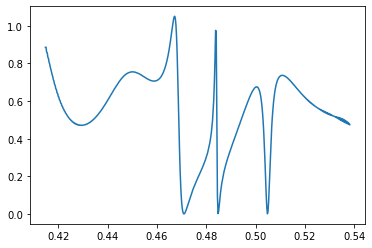

In [11]:
import matplotlib.pyplot as plt
Ts = []
wl = []
for i in range(nfreq):
    wl = np.append(wl, flux_freqs[i])
    Ts = np.append(Ts, bend[i]/straight[i])
plt.figure()
#plt.ylim(0,1)
plt.plot(wl,Ts)